In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline 

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleTiny-v0"
iteration_count = 200
training_episode_count = 10
eval_episode_count = 10
maximum_node_count = 5
maximum_total_credentials = 3


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 200|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/77 (0.01)
    explore-remote: 2/109 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/11 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 2|Iteration 200|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/73 (0.01)
    explore-remote: 2/98 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/26 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 3|Iteration 200|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/85 (0.01)
    explore-remote: 2/93 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/19 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 4|Iteration 200|reward:   31.0|last_reward_at:   25|Elapsed Time: 0:00:00||


  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/80 (0.01)
    explore-remote: 2/86 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/31 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 5|Iteration 200|reward:   31.0|last_reward_at:   38|Elapsed Time: 0:00:00||


  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/92 (0.01)
    explore-remote: 2/73 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/32 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8239, 


Episode 6|Iteration 200|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||


  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/79 (0.01)
    explore-remote: 2/83 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/35 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8096, 


Episode 7|Iteration 200|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||


  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/77 (0.01)
    explore-remote: 2/77 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/43 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7956, 


Episode 8|Iteration 200|reward:   31.0|last_reward_at:   43|Elapsed Time: 0:00:00||


  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/95 (0.01)
    explore-remote: 2/76 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/26 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7818, 


Episode 9|Iteration 200|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||


  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/59 (0.02)
    explore-remote: 2/86 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/52 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7683, 


Episode 10|Iteration 200|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/78 (0.01)
    explore-remote: 2/70 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/49 (0.00)
  exploit deflected to exploration: 1
simulation ended


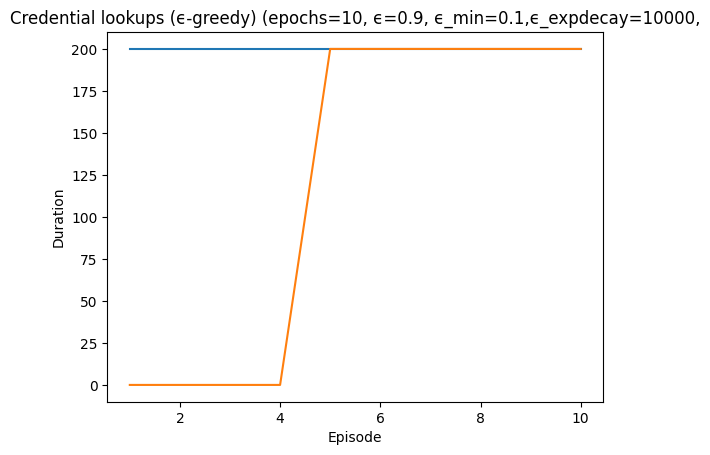

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/10 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   66|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/50 (0.02)
    explore-remote: 2/83 (0.02)
    explore-connect: 1/60 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/3 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 2/10 'Tabular Q-learning' ϵ=0.8653, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 200|reward: 1031.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/41 (0.02)
    explore-remote: 1/88 (0.01)
    explore-connect: 1/66 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/1 (0.00)
  exploit deflected to exploration: 33
  ## Episode: 3/10 'Tabular Q-learning' ϵ=0.8317, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 200|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/44 (0.00)
    explore-remote: 1/77 (0.01)
    explore-connect: 1/71 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/4 (0.00)
  exploit deflected to exploration: 35
  ## Episode: 4/10 'Tabular Q-learning' ϵ=0.7995, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   87|Elapsed Time: 0:00:00||


  Episode 4 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/46 (0.00)
    explore-remote: 2/88 (0.02)
    explore-connect: 1/47 (0.02)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 0/14 (0.00)
  exploit deflected to exploration: 28
  ## Episode: 5/10 'Tabular Q-learning' ϵ=0.7686, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   65|Elapsed Time: 0:00:00||


  Episode 5 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/65 (0.02)
    explore-remote: 1/67 (0.01)
    explore-connect: 1/57 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/7 (0.00)
  exploit deflected to exploration: 52
  ## Episode: 6/10 'Tabular Q-learning' ϵ=0.7388, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   72|Elapsed Time: 0:00:00||


  Episode 6 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/47 (0.02)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/55 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/13 (0.00)
  exploit deflected to exploration: 46
  ## Episode: 7/10 'Tabular Q-learning' ϵ=0.7102, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 200|reward: 1031.0|last_reward_at:   38|Elapsed Time: 0:00:00||


  Episode 7 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/45 (0.00)
    explore-remote: 1/68 (0.01)
    explore-connect: 1/73 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/10 (0.00)
  exploit deflected to exploration: 35
  ## Episode: 8/10 'Tabular Q-learning' ϵ=0.6828, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   88|Elapsed Time: 0:00:00||


  Episode 8 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/38 (0.00)
    explore-remote: 2/61 (0.03)
    explore-connect: 1/76 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 0/20 (0.00)
  exploit deflected to exploration: 42
  ## Episode: 9/10 'Tabular Q-learning' ϵ=0.6564, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 200|reward: 1031.0|last_reward_at:   13|Elapsed Time: 0:00:00||


  Episode 9 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/44 (0.00)
    explore-remote: 1/78 (0.01)
    explore-connect: 1/70 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 0/1 (0.00)
  exploit deflected to exploration: 62
  ## Episode: 10/10 'Tabular Q-learning' ϵ=0.6311, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/35 (0.00)
    explore-remote: 1/76 (0.01)
    explore-connect: 1/75 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 0/9 (0.00)
  exploit deflected to exploration: 67
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 200|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/188 (0.00)
  exploit deflected to exploration: 10
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 200|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/193 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 200|reward:   31.0|last_reward_at:   38|Elapsed Time: 0:00:00||


  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/17 (0.00)
    explore-remote: 1/18 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/162 (0.00)
  exploit deflected to exploration: 36
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 200|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 4 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 1/7 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/174 (0.00)
  exploit deflected to exploration: 24
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 200|reward:   31.0|last_reward_at:   35|Elapsed Time: 0:00:00||


  Episode 5 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/165 (0.00)
  exploit deflected to exploration: 33
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 200|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 6 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/177 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 200|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 7 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/177 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 200|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||


  Episode 8 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/191 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 200|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||


  Episode 9 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/193 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 200|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/194 (0.00)
  exploit deflected to exploration: 4
simulation ended


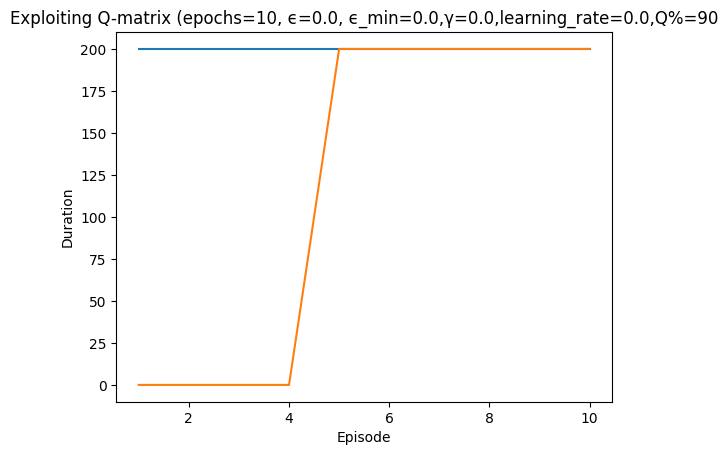

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||/home/wiblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   71|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 1/65 (0.02)
    explore-connect: 1/71 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 1
  ## Episode: 2/10 'DQL' ϵ=0.8688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 200|reward: 1031.0|last_reward_at:   49|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/44 (0.02)
    explore-remote: 0/67 (0.00)
    explore-connect: 1/58 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 2/27 (0.07)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'DQL' ϵ=0.8386, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 200|reward: 1031.0|last_reward_at:  120|Elapsed Time: 0:00:07||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 1/63 (0.02)
    explore-connect: 1/59 (0.02)
    exploit-local: 0/1 (0.00)
    exploit-remote: 1/30 (0.03)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 9
  ## Episode: 4/10 'DQL' ϵ=0.8097, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   33|Elapsed Time: 0:00:15||


  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/47 (0.02)
    explore-remote: 1/66 (0.01)
    explore-connect: 1/68 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 17
  ## Episode: 5/10 'DQL' ϵ=0.7819, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   15|Elapsed Time: 0:00:17||


  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/42 (0.02)
    explore-remote: 1/62 (0.02)
    explore-connect: 0/83 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 38
  ## Episode: 6/10 'DQL' ϵ=0.7551, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:17||


  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/45 (0.02)
    explore-remote: 1/69 (0.01)
    explore-connect: 0/74 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/8 (0.11)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 39
  ## Episode: 7/10 'DQL' ϵ=0.7294, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 200|reward: 1031.0|last_reward_at:   33|Elapsed Time: 0:00:16||


  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 2/71 (0.03)
    explore-connect: 0/69 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 39
  ## Episode: 8/10 'DQL' ϵ=0.7047, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:20||


  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/42 (0.02)
    explore-remote: 1/71 (0.01)
    explore-connect: 1/77 (0.01)
    exploit-local: 0/3 (0.00)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 53
  ## Episode: 9/10 'DQL' ϵ=0.6810, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 200|reward: 1031.0|last_reward_at:   10|Elapsed Time: 0:00:18||


  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/44 (0.00)
    explore-remote: 0/64 (0.00)
    explore-connect: 0/67 (0.00)
    exploit-local: 1/1 (0.50)
    exploit-remote: 2/20 (0.09)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 10/10 'DQL' ϵ=0.6583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   10|Elapsed Time: 0:00:16||


  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/39 (0.03)
    explore-remote: 0/60 (0.00)
    explore-connect: 0/68 (0.00)
    exploit-local: 0/4 (0.00)
    exploit-remote: 2/25 (0.07)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 36
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 200|reward: 1031.0|last_reward_at:    5|Elapsed Time: 0:00:26||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/32 (0.00)
    explore-remote: 0/46 (0.00)
    explore-connect: 0/46 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/72 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 124
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 200|reward: 1031.0|last_reward_at:    5|Elapsed Time: 0:00:41||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/30 (0.00)
    explore-remote: 0/64 (0.00)
    explore-connect: 0/39 (0.00)
    exploit-local: 1/3 (0.25)
    exploit-remote: 2/60 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 133
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 200|reward: 1031.0|last_reward_at:    9|Elapsed Time: 0:00:55||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 0/37 (0.00)
    explore-connect: 0/37 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 2/100 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 89
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:52||


  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 0/31 (0.00)
    explore-connect: 0/38 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 2/94 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 85
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 200|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:48||


  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/34 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 2/107 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 71
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 200|reward: 1031.0|last_reward_at:    5|Elapsed Time: 0:00:45||


  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/26 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 2/122 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 63
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:53||


  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 0/40 (0.00)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/13 (0.07)
    exploit-remote: 2/99 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 84
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   10|Elapsed Time: 0:00:50||


  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 1/122 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 68
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 200|reward: 1031.0|last_reward_at:    5|Elapsed Time: 0:00:53||


  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 0/35 (0.00)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 2/103 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 77
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:01:03||


  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/18 (0.00)
    explore-remote: 0/44 (0.00)
    explore-connect: 0/40 (0.00)
    exploit-local: 1/22 (0.04)
    exploit-remote: 2/72 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 102
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=10,iteration_count=200,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   33|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/49 (0.02)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/66 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 200|reward: 1031.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/61 (0.02)
    explore-remote: 2/73 (0.03)
    explore-connect: 1/62 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 200|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/37 (0.03)
    explore-remote: 2/85 (0.02)
    explore-connect: 1/74 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 200|reward: 1031.0|last_reward_at:  104|Elapsed Time: 0:00:00||


  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/55 (0.02)
    explore-remote: 2/72 (0.03)
    explore-connect: 1/69 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/52 (0.02)
    explore-remote: 2/80 (0.02)
    explore-connect: 1/64 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   35|Elapsed Time: 0:00:00||


  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/41 (0.02)
    explore-remote: 2/75 (0.03)
    explore-connect: 1/80 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 200|reward: 1031.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/46 (0.02)
    explore-remote: 2/76 (0.03)
    explore-connect: 1/74 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/52 (0.02)
    explore-remote: 2/78 (0.03)
    explore-connect: 1/66 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 200|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/42 (0.02)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/73 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   50|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/58 (0.02)
    explore-remote: 2/76 (0.03)
    explore-connect: 1/62 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


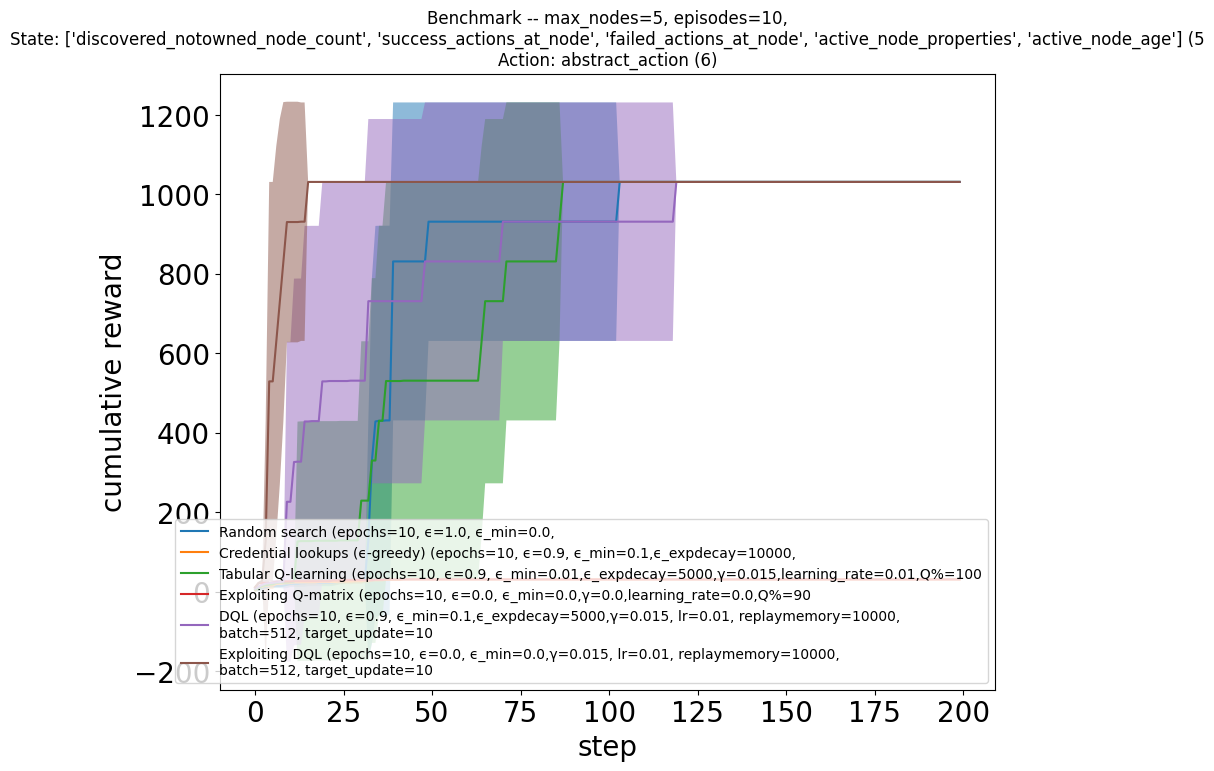

In [13]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

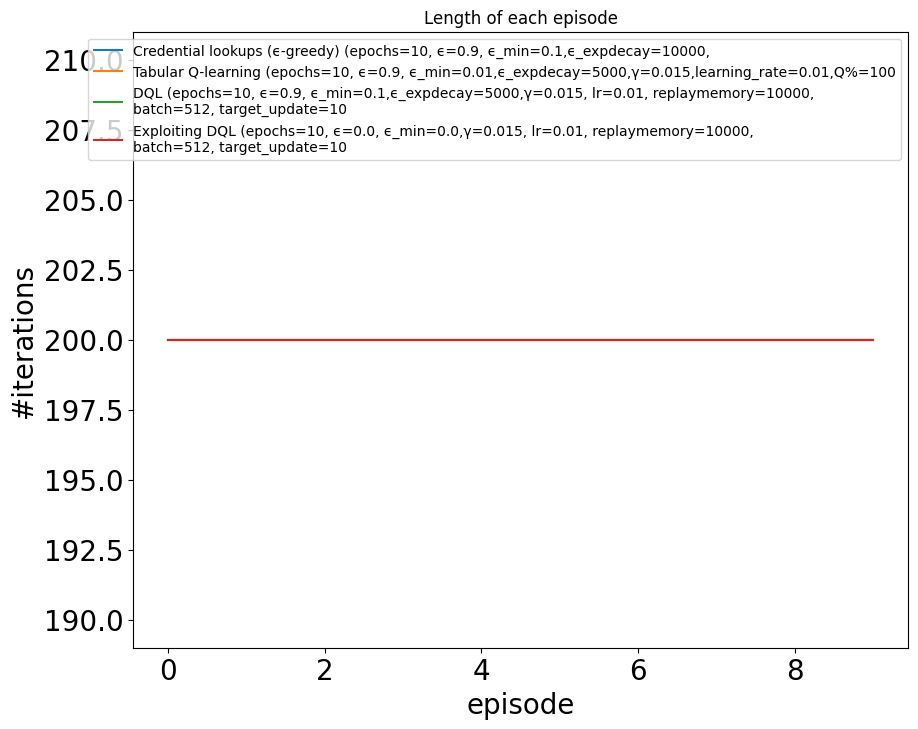

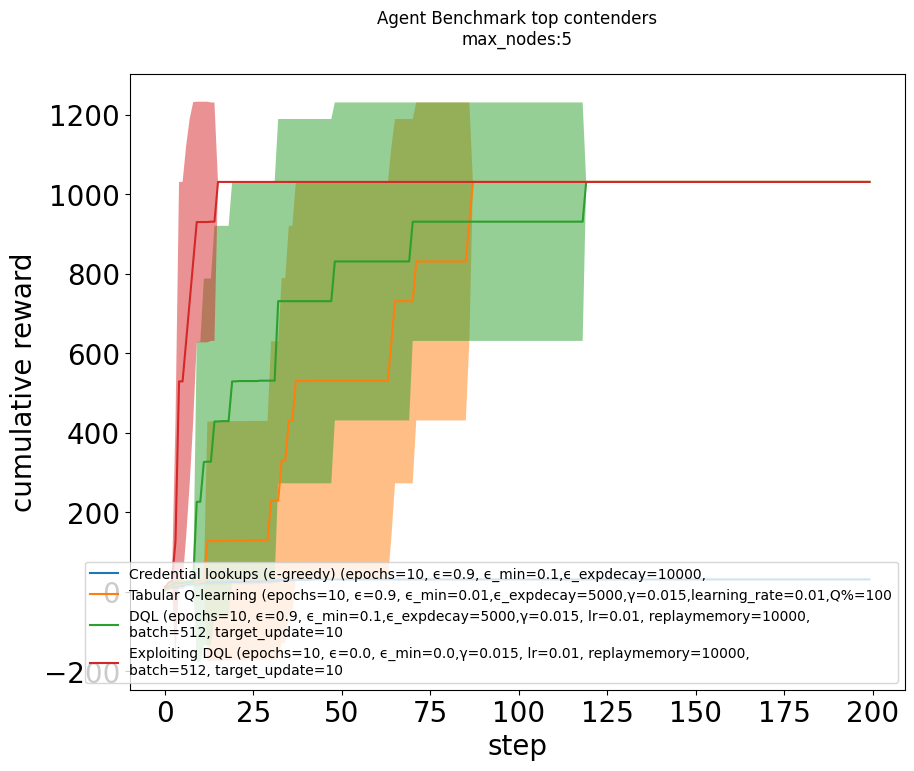

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

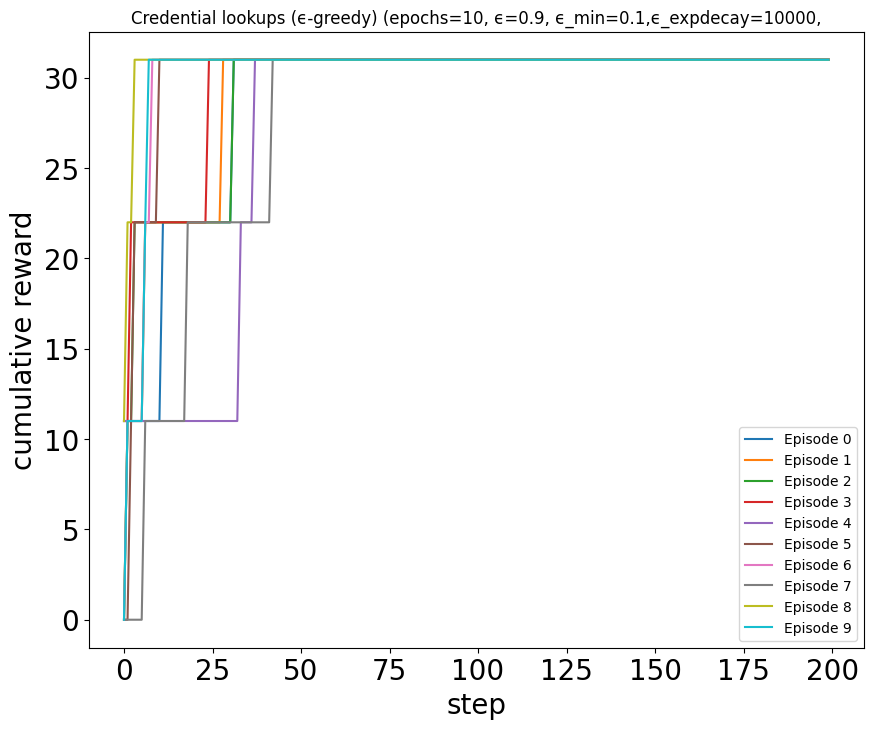

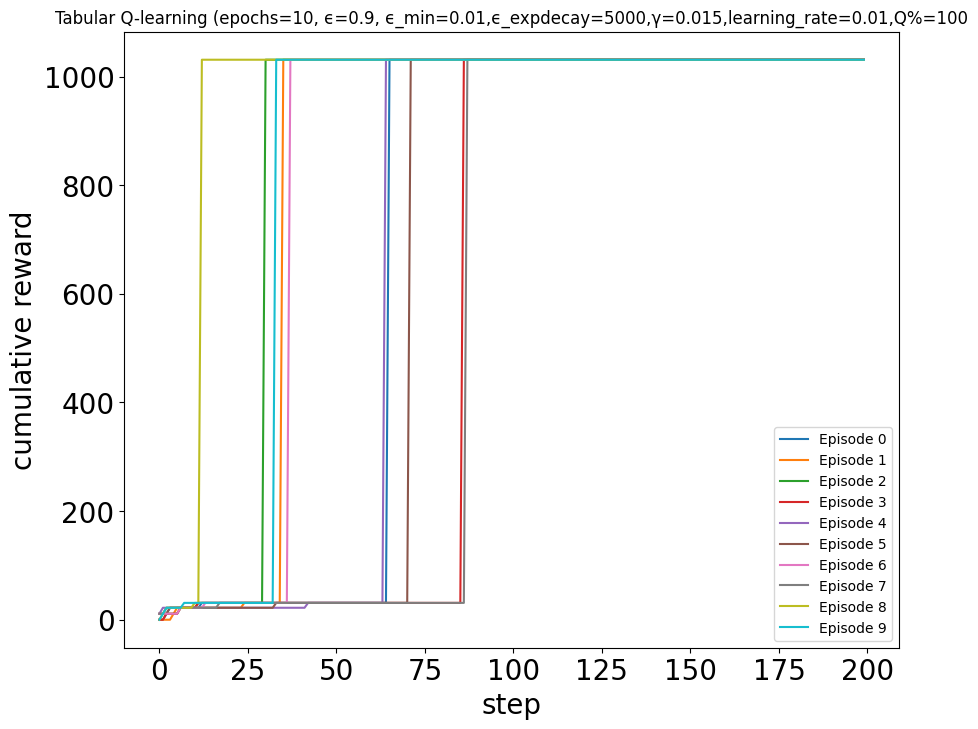

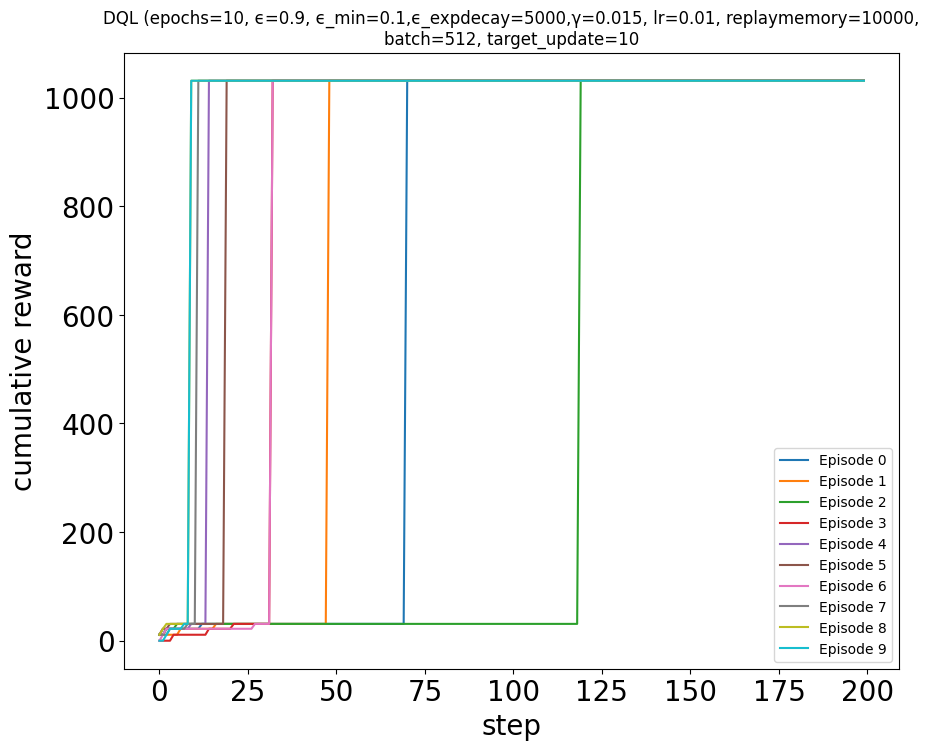

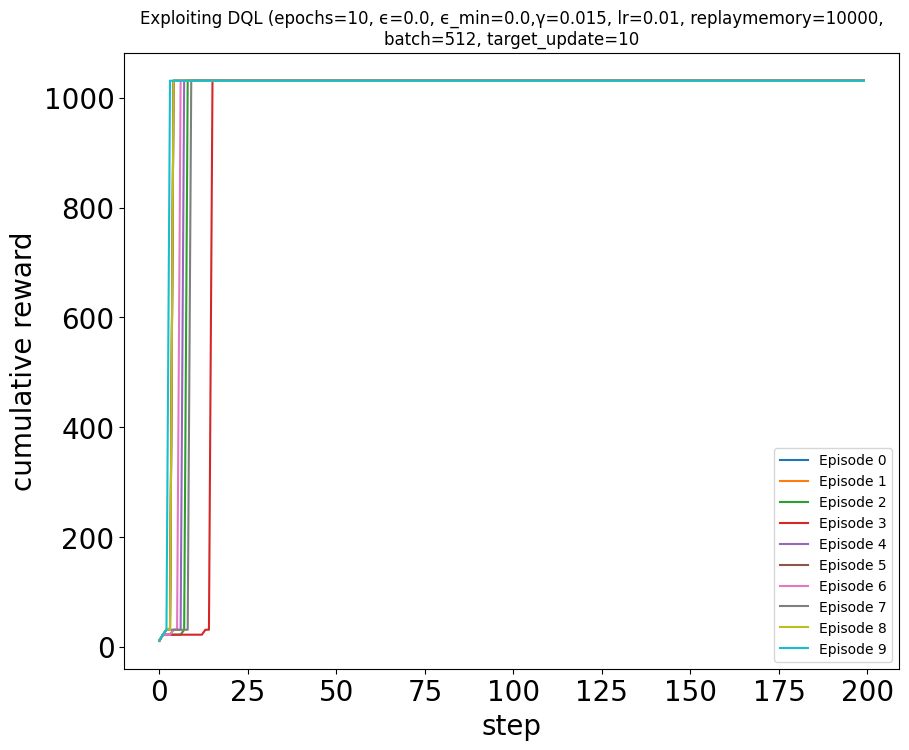

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)